In [2]:
import numpy as np 
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize']=[15,7]

In [3]:
fifa=pd.read_csv("fifa.csv")
variable=pd.read_csv("fifa_ variable_information.csv")

In [4]:
fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [5]:
variable

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [6]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [7]:
# Info of the data

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [9]:
 # Summary statistics of the data
    
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# Feature Engineering and Data Preprocessing

In [15]:
 # Converting Wage into Float :
    
lst=[]
for i in fifa['Wage'].values:
       lst.append(float(str(i)[str(i).index('€')+1:-1]+'000'))
fifa['Wage']=lst 
    

In [ ]:
# Converting Value column in Float:

lst=[]
for i in fifa['Value'].values:
    if i[-1]=='M':
         lst.append(float(i[i.index('€')+1:i.index('M')])*1000000)
    elif i[-1]=='K':
        lst.append(float(i[i.index('€')+1:i.index('K')])*1000)
    else:
        lst.append(float(i[i.index('€')+1:]))
fifa['Value']=lst

In [29]:
#### Splitting Day and Year from Joined column 

fifa[['Day','Year']]=fifa.Joined.str.split(', ',expand=True)

In [209]:
fifa['Year']=fifa.Year.astype(int)

In [30]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Day',
       'Year'],
      dtype='object')

In [31]:
fifa[['Day','Year']]  # Day and Year is featured from the Joined column

,Day,Year
0,Jul 1,2004
1,Jul 10,2018
2,Aug 3,2017
3,Jul 1,2011
4,Aug 30,2015
...,...,...
18202,May 3,2017
18203,Mar 19,2018
18204,Jul 1,2017
18205,Apr 24,2018


In [36]:
#### Treating the Missing values in the Year column 
fifa.Year.mode() # 2018  

year=['2004', '2018', '2017', '2011', '2015', '2012', '2014', '2005',
       '2010', '2016', '2008', '2013','2007', '2009', '2002',
       '2003', '2006', '2001', '1991', '1998', '2000', '1999']

def yearbharo(x):
    if x in year:
        return x
    else:
        return('2018')  # 2018 is the mode of the column as there is arround 1553 missing values 
fifa['Year']=fifa.Year.apply(yearbharo)

In [37]:
fifa.Year.isnull().sum() # No there is no missing values in the Year column 

0

# Dropping Unncessary columns from the Data

In [41]:
fifa.drop(['ID','Photo','Flag','Club Logo','Joined','Day','Loaned From'],inplace=True,axis=1)

In [42]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Year'],
      dtype='object')

In [43]:
## Checking the Missing values:

fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpee

# UNIVARIATE ANALYSIS:

In [14]:
nums=new.select_dtypes(include=np.number).columns

In [15]:
nums

Index(['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [16]:
### AGE

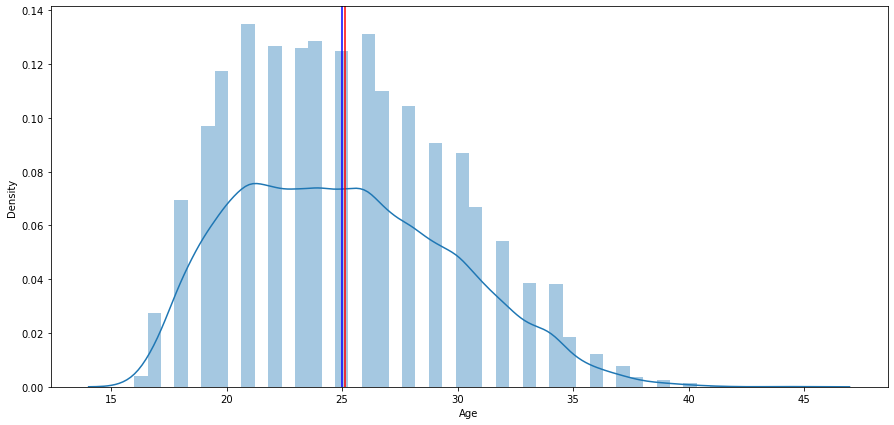

In [17]:
sns.distplot(new.Age)
plt.axvline(new.Age.mean(),color='red')
plt.axvline(new.Age.median(),color='blue')
plt.show()

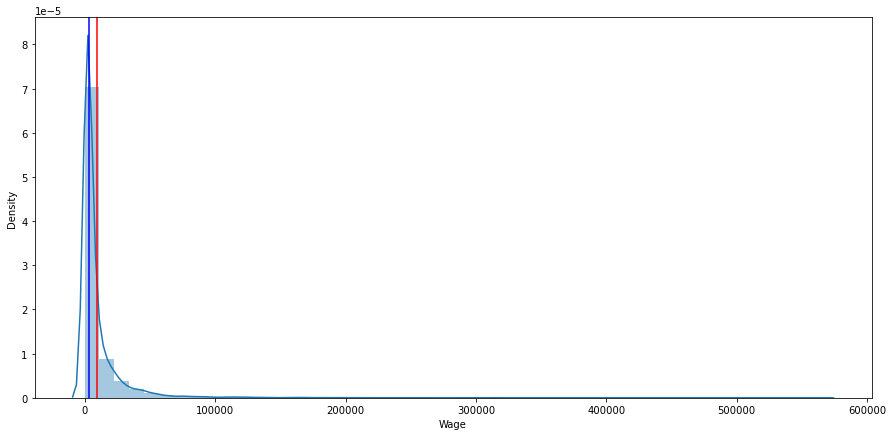

In [204]:
sns.distplot(fifa.Wage)
plt.axvline(fifa.Wage.mean(),color='red')
plt.axvline(fifa.Wage.median(),color='blue')
plt.show()

# Wage is extremely skewed

In [205]:
fifa.Wage.mean()

9731.312132696215

<AxesSubplot:xlabel='Wage', ylabel='Overall'>

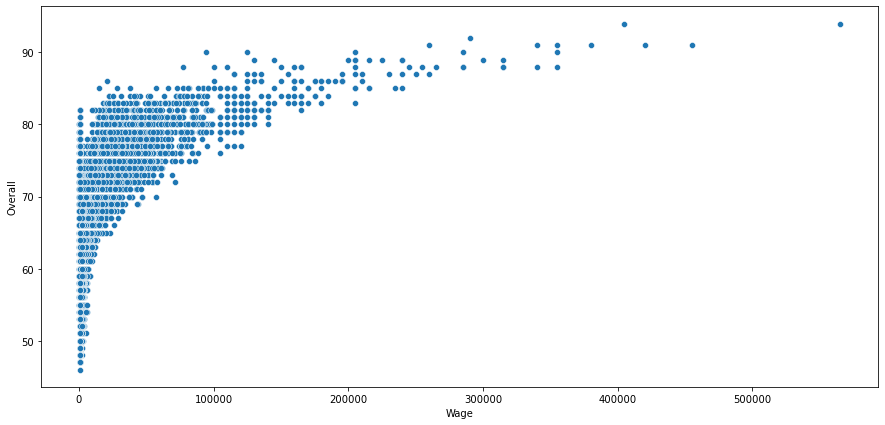

In [213]:
sns.scatterplot(x='Wage',y='Overall',data=fifa)

In [18]:
### Inf :: Most of the players are of age 25
#.         Mean and the Median of the age is almost same 


In [ ]:
## Overall

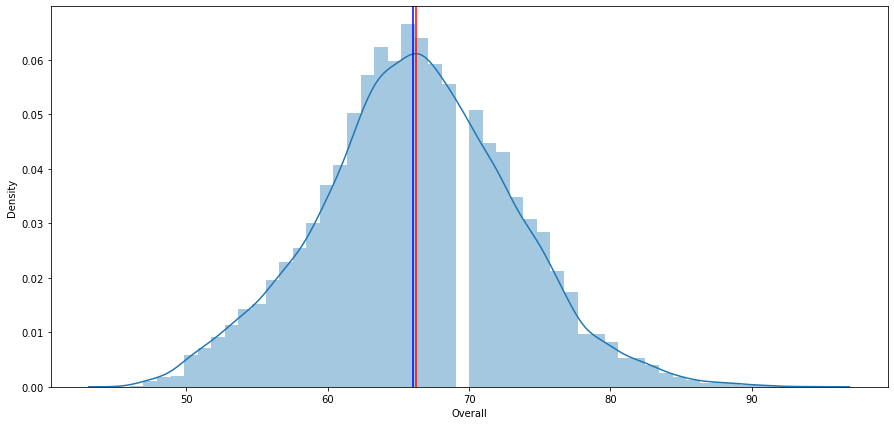

In [19]:
sns.distplot(new.Overall)
plt.axvline(new.Overall.mean(),color='red')
plt.axvline(new.Overall.median(),color='blue')
plt.show()

In [44]:
# checking general distribution of numerical attributes in the Data using Loop:
col=['Crossing','Finishing','HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']


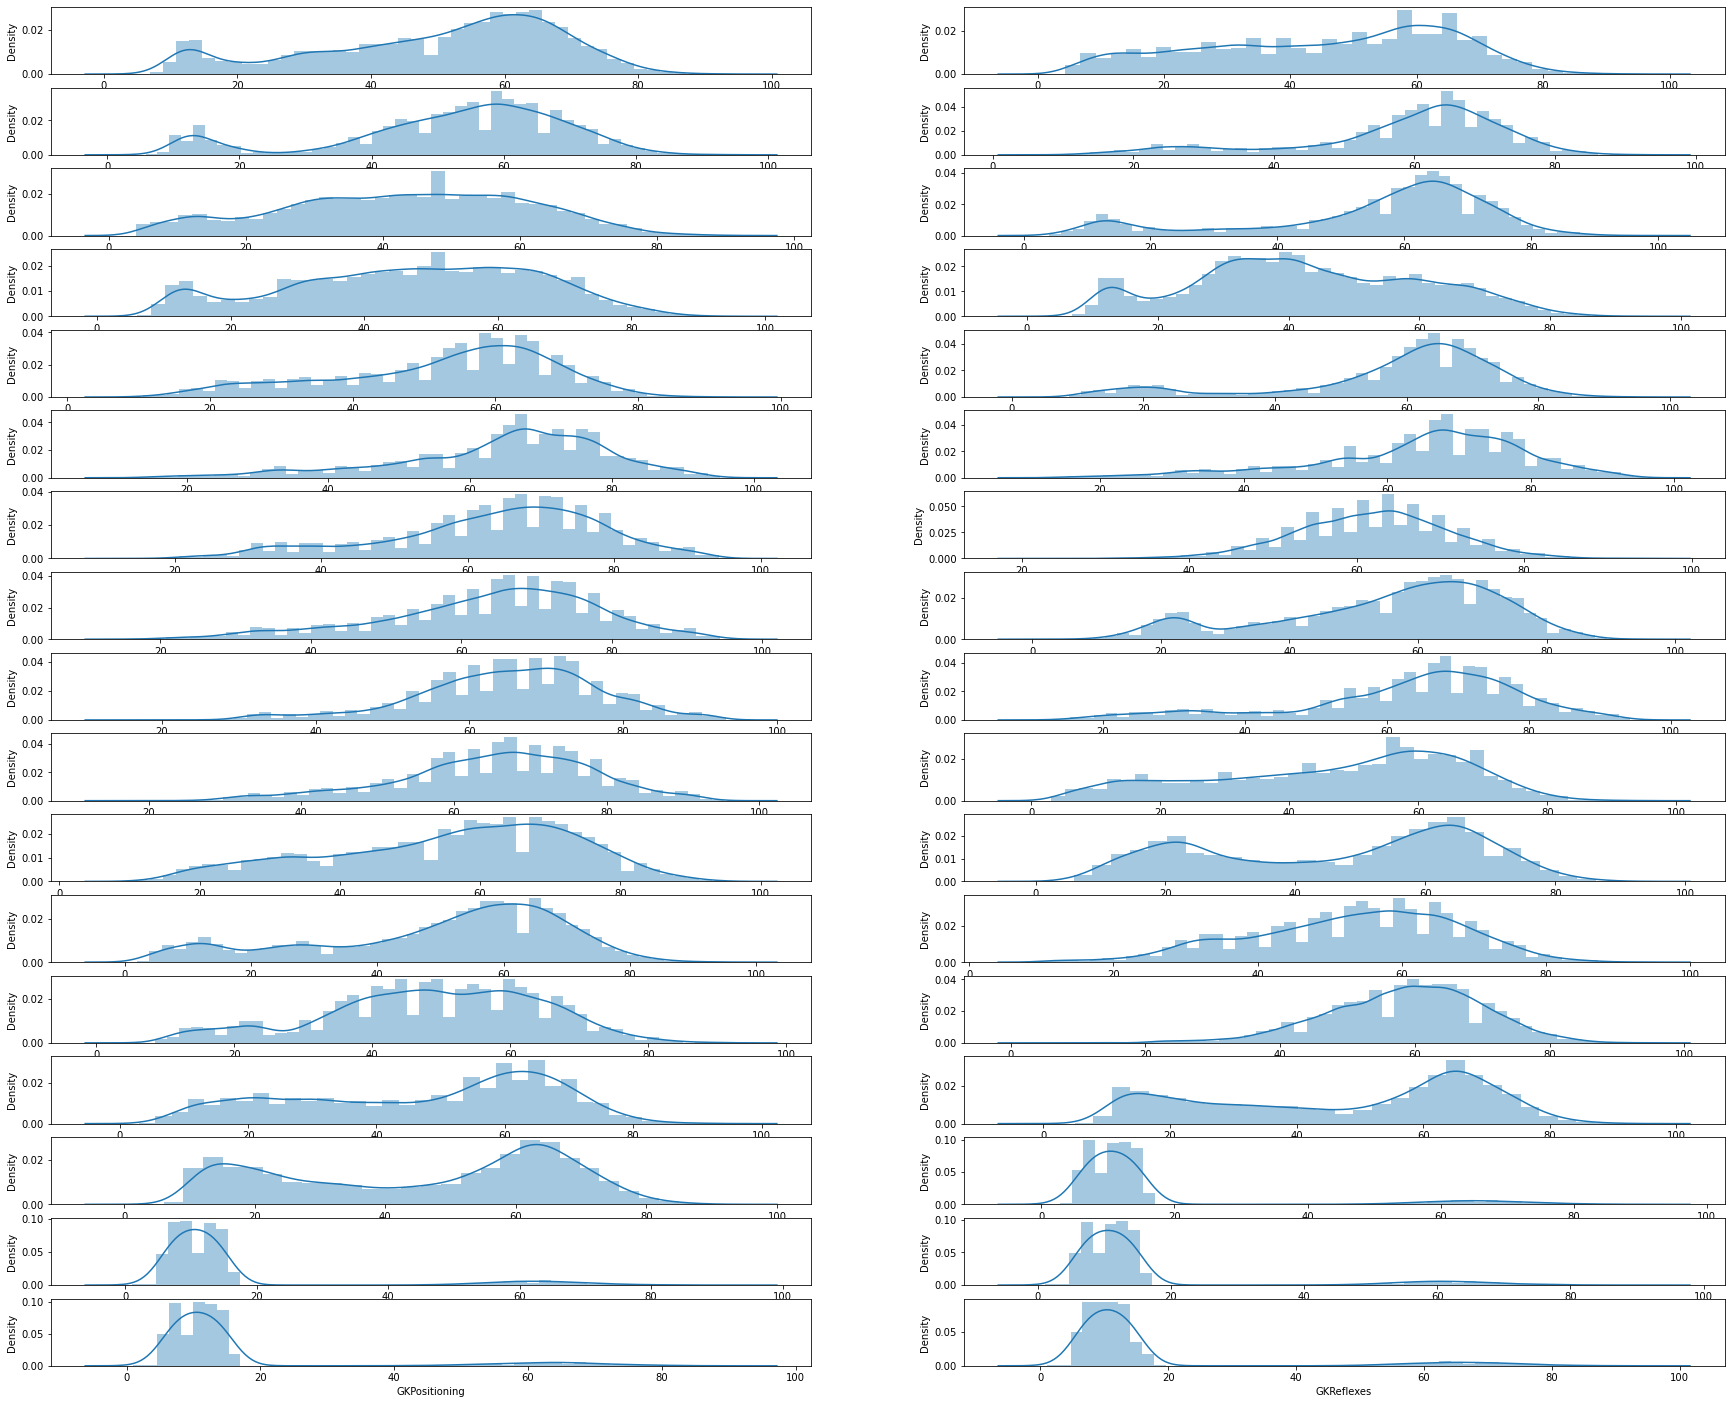

In [52]:
rows=17
cols=2
counter=1
plt.rcParams['figure.figsize']=[30,25]
for i in col:
    plt.subplot(rows,cols,counter)
    sns.distplot(fifa.loc[:,i].dropna())
    counter+=1
    
plt.tight_layout
plt.show()

In [58]:
# Filling the missing values in the numerical column: 


num_col=['Crossing','Finishing','HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']




In [59]:
fifa.loc[fifa.Crossing.isnull()] # As there are missing values in num_col and the pattern is the overall rating is 62 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Year
13236,J. McNulty,33,Scotland,62,62,Rochdale,120000.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13237,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,300000.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13238,J. Stead,35,England,62,62,Notts County,140000.0,3000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13239,A. Semprini,20,Italy,62,72,Brescia,425000.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13240,R. Bingham,24,England,62,66,Hamilton Academical FC,400000.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13241,K. Dankowski,21,Poland,62,72,Śląsk Wrocław,425000.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13242,I. Colman,23,Argentina,62,70,Club Atlético Aldosivi,450000.0,2000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13243,M. Feeney,19,England,62,78,Everton,600000.0,5000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13244,R. Minor,30,Denmark,62,62,Hobro IK,230000.0,2000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
13245,Klauss,21,Brazil,62,69,HJK Helsinki,425000.0,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [68]:
fifa.loc[fifa.Overall==62,'Crossing'].median()

51.0

In [63]:
for i in num_col:
    fifa[i]=fifa[i].fillna(round(fifa.loc[fifa.Overall==62,i].median()))

In [78]:
Cat_col=['Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type']

In [79]:
for i in Cat_col:
    fifa[i]=fifa[i].fillna(fifa[i].mode().values[0])
    

In [87]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                       0
Jersey Number                  0
Contract Valid Until           0
Height                        48
Weight                        48
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallControl                    0
Acceleration                   0
SprintSpee

In [83]:
# Handeling missing values for Jersey Number and Position

fifa.Position=fifa.Position.fillna('Not Known')
fifa['Jersey Number']=fifa['Jersey Number'].fillna('Unknown')

In [85]:
#Handling Missing Values for Club


fifa.Club=fifa.Club.fillna('Not Known')

In [86]:
#Handling missing values for Contract Valid Until

fifa['Contract Valid Until']=fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode().values[0])

In [89]:
fifa['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [90]:
year=['2021', '2022', '2020', '2023', '2019', '2024','2025', '2026','2018']


In [92]:
#Keeping only years from Contract Vaalid until

def yearrakho(x):
    if x in year:
        return int(x.strip())
    else:
        return int(x[x.index(',')+2:].strip())

fifa['Contract Valid Until']=fifa['Contract Valid Until'].apply(yearrakho)

In [94]:
## Converting Weight into Float:

In [95]:
fifa.Weight.unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs', nan,
       '110lbs', '119lbs', '234lbs'], dtype=object)

In [96]:
weights=['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs',
       '110lbs', '119lbs', '234lbs']

In [97]:
# converting weight into float:

def weightbharo(x):
    if x in weights:
        return float(x[:x.index('l')])

fifa['Weight']=fifa.Weight.apply(weightbharo)

In [100]:
#Handling Missing Values for Weight

fifa.Weight=fifa.Weight.fillna(fifa.Weight.median())

In [101]:
# Converting Height into cms and removing quotation  and adding decimal points

In [102]:
fifa.Height.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [103]:
height=["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"]

In [105]:
def heightbadlo(x):
    if x in height:
        return float(x[0])*30.48 + float(x[2:])*2.54

In [106]:
fifa.Height=fifa.Height.apply(heightbadlo)

In [108]:
#Handling Missing Values for Height

fifa.Height=fifa.Height.fillna(fifa.Height.median())

In [109]:
fifa.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                       0
Jersey Number                  0
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallControl                    0
Acceleration                   0
SprintSpee

In [111]:
fifa['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [112]:
def release_clause(x):
    if x is not None:
        if str(x)[-1]=='M':
            return float(str(x)[str(x).index('€')+1:str(x).index('M')])*1000000
        elif str(x)[-1]=='K':
            return float(str(x)[str(x).index('€')+1:str(x).index('K')])*1000
        
fifa['Release Clause']=fifa['Release Clause'].apply(release_clause)    

In [114]:
fifa.loc[(fifa['Release Clause'].isnull()) & (fifa.Overall>80),'Release Clause']=fifa.loc[fifa.Overall>80,'Release Clause'].median()
fifa.loc[(fifa['Release Clause'].isnull()) & (fifa.Overall>70),'Release Clause']=fifa.loc[fifa.Overall>70,'Release Clause'].median()
fifa.loc[(fifa['Release Clause'].isnull()) & (fifa.Overall>60),'Release Clause']=fifa.loc[fifa.Overall>60,'Release Clause'].median()
fifa.loc[(fifa['Release Clause'].isnull()) & (fifa.Overall>50),'Release Clause']=fifa.loc[fifa.Overall>50,'Release Clause'].median()
fifa.loc[(fifa['Release Clause'].isnull()) & (fifa.Overall>40),'Release Clause']=fifa.loc[fifa.Overall>40,'Release Clause'].median()

In [115]:
fifa.isnull().sum() # Hence the Missing values are treated for every attribute

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

#                                         REQUIRED ANALYSIS:

# Question 1

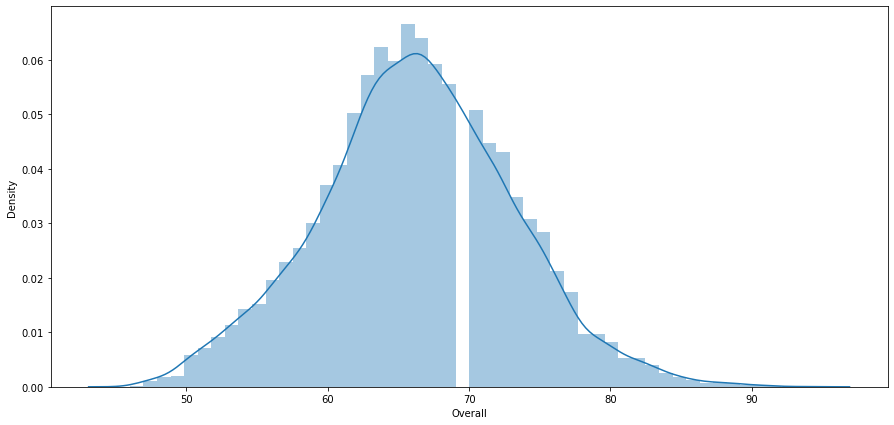

In [118]:
# Plotting the dist Plot for the attribute Overall Rating of the Players


plt.rcParams['figure.figsize']=[15,7]
sns.distplot(fifa.Overall)

plt.show()

# Question 2:


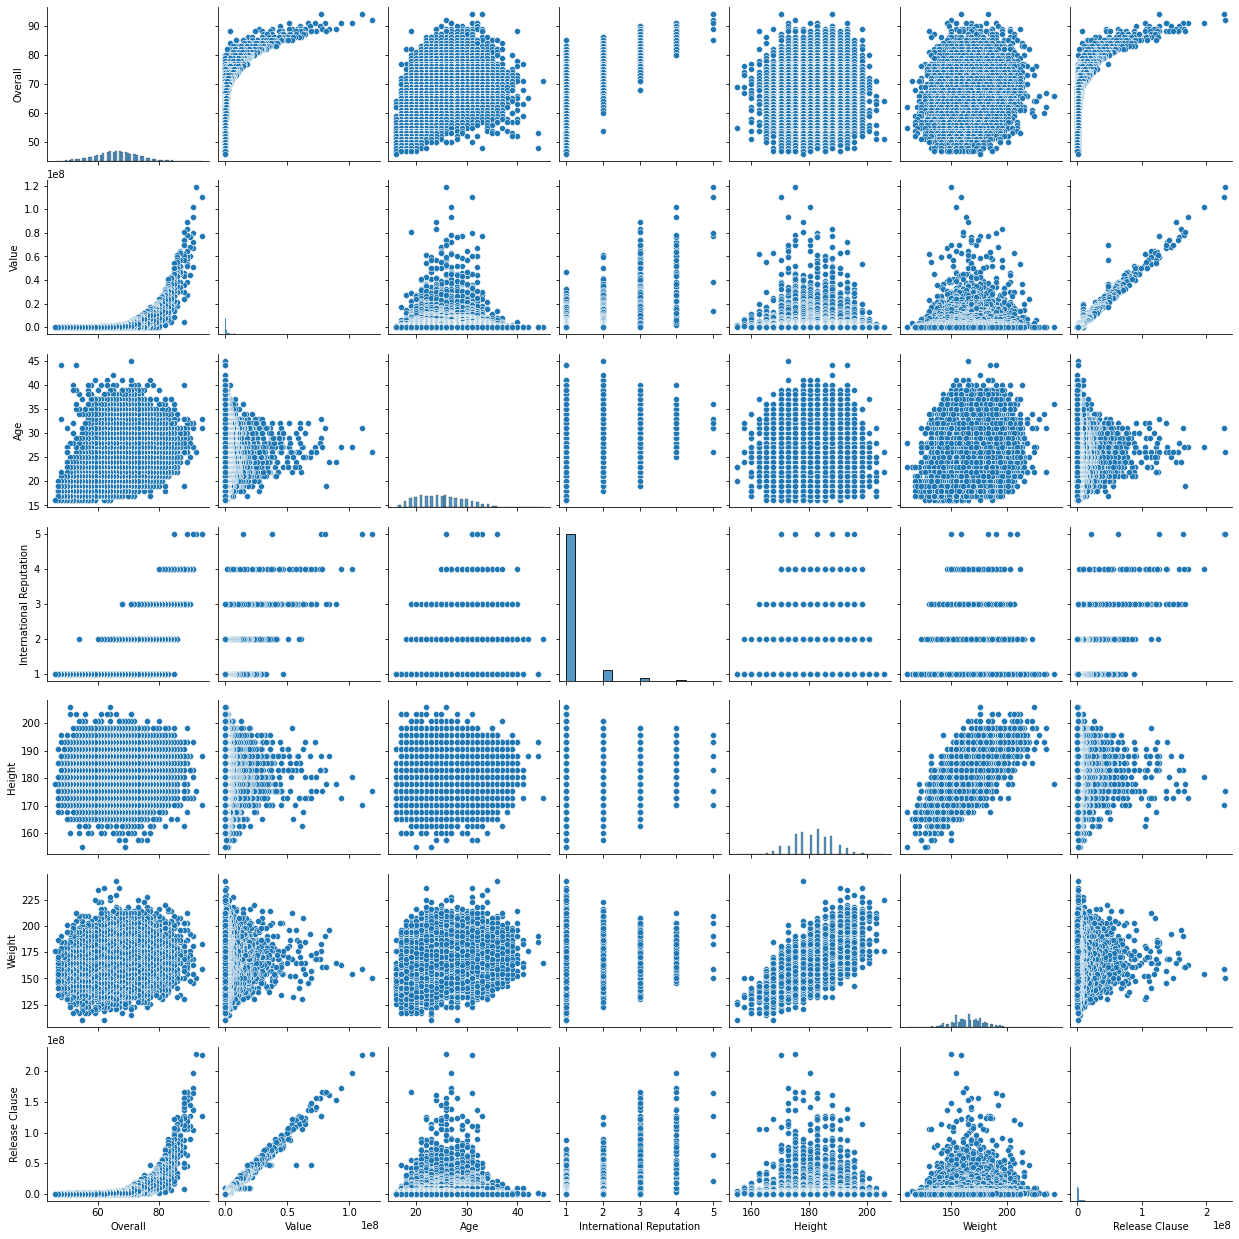

In [120]:
sns.pairplot(fifa[['Overall','Value','Age','International Reputation','Height','Weight','Release Clause']])
plt.show()

# Question 3

In [ ]:
#3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [121]:
new=fifa.loc[fifa['Contract Valid Until']==2020,['Name','Overall','Wage','Age','Value']].sort_values(by='Overall',ascending=False).head(20)

In [123]:
new

,Name,Overall,Wage,Age,Value
3,De Gea,91,260000.0,27,72000000.0
6,L. Modrić,91,420000.0,32,67000000.0
8,Sergio Ramos,91,380000.0,32,51000000.0
5,E. Hazard,91,340000.0,27,93000000.0
13,David Silva,90,285000.0,32,60000000.0
21,E. Cavani,89,200000.0,31,60000000.0
24,G. Chiellini,89,215000.0,33,27000000.0
31,C. Eriksen,88,205000.0,26,73500000.0
39,Thiago Silva,88,165000.0,33,24000000.0
50,D. Mertens,87,135000.0,31,45000000.0


In [124]:
# Mean of the Age 
new['Age'].mean()

30.65

In [125]:
# Mean of the Wage
new['Wage'].mean()

205450.0

In [126]:
# Correlation between Overall rating and value of the palyers 
new[['Overall','Value']].corr()


# Inf:: There is a strong correlation between both attributes 

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


# Question 4

# 4. Generate tables containing the top 5 players by Overall rating for each unique position.
a) Are there any players appearing in more than one Table. Please point out such players.
b) What is the average wage one can expect to pay for the top 5 in every position?




In [134]:
fifa.groupby('Overall')[['Name']].count()

,Name
Overall,
46,1
47,20
48,32
49,36
50,103
51,125
52,159
53,199
54,250


In [135]:
fifa.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 'Not Known'],
      dtype=object)

In [139]:
fifa.loc[fifa.Position=='RF',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
0,L. Messi,94,565000.0,110500000.0
50,D. Mertens,87,135000.0,45000000.0
528,D. Valeri,80,12000.0,11500000.0
890,L. Podolski,78,11000.0,6500000.0
1774,C. Ciano,75,17000.0,6500000.0


In [140]:
fifa.loc[fifa.Position=='RF',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

148000.0

In [141]:
fifa.loc[fifa.Position=='ST',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
1,Cristiano Ronaldo,94,405000.0,77000000.0
10,R. Lewandowski,90,205000.0,77000000.0
16,H. Kane,89,205000.0,83500000.0
23,S. Agüero,89,300000.0,64500000.0
36,G. Bale,88,355000.0,60000000.0


In [142]:
fifa.loc[fifa.Position=='ST',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

294000.0

In [144]:
fifa.loc[fifa.Position=='LW',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
2,Neymar Jr,92,290000.0,118500000.0
30,Isco,88,315000.0,73500000.0
32,Coutinho,88,340000.0,69500000.0
29,L. Insigne,88,165000.0,62000000.0
55,L. Sané,86,195000.0,61000000.0


In [145]:
fifa.loc[fifa.Position=='LW',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

261000.0

In [146]:
fifa.loc[fifa.Position=='GK',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
3,De Gea,91,260000.0,72000000.0
9,J. Oblak,90,94000.0,68000000.0
18,M. ter Stegen,89,240000.0,58000000.0
19,T. Courtois,89,240000.0,53500000.0
22,M. Neuer,89,130000.0,38000000.0


In [147]:
fifa.loc[fifa.Position=='GK',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

192800.0

In [148]:
fifa.loc[fifa.Position=='RCM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
4,K. De Bruyne,91,355000.0,102000000.0
6,L. Modrić,91,420000.0,67000000.0
53,I. Rakitić,87,260000.0,46500000.0
82,J. Kimmich,85,92000.0,40500000.0
83,Saúl,85,77000.0,50500000.0


In [149]:
fifa.loc[fifa.Position=='RCM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

240800.0

In [150]:
fifa.loc[fifa.Position=='LF',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
5,E. Hazard,91,340000.0,93000000.0
15,P. Dybala,89,205000.0,89000000.0
76,Iniesta,86,21000.0,21500000.0
272,Jonathan Viera,82,31000.0,22500000.0
1379,S. Blanco,76,9000.0,7500000.0


In [151]:
fifa.loc[fifa.Position=='LF',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

121200.0

In [152]:
fifa.loc[fifa.Position=='RS',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
7,L. Suárez,91,455000.0,80000000.0
109,Z. Ibrahimović,85,15000.0,14000000.0
148,Falcao,84,115000.0,25000000.0
267,W. Ben Yedder,82,28000.0,23500000.0
357,S. Zaza,81,48000.0,21000000.0


In [153]:
fifa.loc[fifa.Position=='RS',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

132200.0

In [154]:
fifa.loc[fifa.Position=='RCB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
8,Sergio Ramos,91,380000.0,51000000.0
39,Thiago Silva,88,165000.0,24000000.0
54,Piqué,87,240000.0,34000000.0
62,R. Varane,86,210000.0,50000000.0
70,L. Bonucci,86,160000.0,30000000.0


In [155]:
fifa.loc[fifa.Position=='RCB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

231000.0

In [156]:
fifa.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 'Not Known'],
      dtype=object)

In [157]:
fifa.loc[fifa.Position=='LCM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
11,T. Kroos,90,355000.0,76500000.0
13,David Silva,90,285000.0,60000000.0
52,M. Hamšík,87,125000.0,46500000.0
63,M. Verratti,86,135000.0,55000000.0
114,Bruno Fernandes,84,22000.0,40500000.0


In [158]:
fifa.loc[fifa.Position=='LCM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

184400.0

In [159]:
fifa.loc[fifa.Position=='CB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
12,D. Godín,90,125000.0,44000000.0
42,S. Umtiti,87,205000.0,57000000.0
73,M. Benatia,86,160000.0,30000000.0
89,N. Otamendi,85,170000.0,28500000.0
102,Naldo,85,38000.0,9000000.0


In [160]:
fifa.loc[fifa.Position=='CB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

139600.0

In [161]:
fifa.loc[fifa.Position=='LDM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
14,N. Kanté,89,225000.0,63000000.0
91,Paulinho,85,235000.0,37000000.0
119,Marquinhos,84,90000.0,35500000.0
217,Lucas Leiva,83,64000.0,17500000.0
323,F. de Jong,81,19000.0,26000000.0


In [162]:
fifa.loc[fifa.Position=='LDM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

126600.0

In [163]:
fifa.loc[fifa.Position=='CAM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
17,A. Griezmann,89,145000.0,78000000.0
31,C. Eriksen,88,205000.0,73500000.0
61,Roberto Firmino,86,195000.0,53000000.0
66,T. Müller,86,135000.0,45000000.0
74,M. Özil,86,190000.0,43500000.0


In [164]:
fifa.loc[fifa.Position=='CAM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

174000.0

In [165]:
fifa.loc[fifa.Position=='CDM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
20,Sergio Busquets,89,315000.0,51500000.0
27,Casemiro,88,285000.0,59500000.0
72,M. Pjanić,86,180000.0,44000000.0
75,Fernandinho,86,185000.0,18000000.0
118,Fabinho,84,120000.0,34000000.0


In [166]:
fifa.loc[fifa.Position=='CDM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

217000.0

In [167]:
fifa.loc[fifa.Position=='LS',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
21,E. Cavani,89,200000.0,60000000.0
38,G. Higuaín,88,245000.0,57000000.0
100,Diego Costa,85,100000.0,38500000.0
151,A. Gómez,84,53000.0,30000000.0
174,Gerard Moreno,83,53000.0,32000000.0


In [168]:
fifa.loc[fifa.Position=='LS',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

130200.0

In [169]:
fifa.loc[fifa.Position=='LCB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
24,G. Chiellini,89,215000.0,27000000.0
34,M. Hummels,88,160000.0,46000000.0
44,K. Koulibaly,87,115000.0,51000000.0
51,J. Vertonghen,87,155000.0,34000000.0
59,V. van Dijk,86,165000.0,44500000.0


In [170]:
fifa.loc[fifa.Position=='LCB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

162000.0

In [171]:
fifa.loc[fifa.Position=='RM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
25,K. Mbappé,88,100000.0,81000000.0
26,M. Salah,88,255000.0,69500000.0
122,F. Thauvin,84,72000.0,39000000.0
137,José Callejón,84,105000.0,27500000.0
138,A. Di María,84,125000.0,29500000.0


In [172]:
fifa.loc[fifa.Position=='RM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

131400.0

In [173]:
fifa.loc[fifa.Position=='LAM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
28,J. Rodríguez,88,315000.0,69500000.0
365,D. Tadić,81,26000.0,17500000.0
1587,Fabrio Farinha,75,31000.0,7000000.0
2247,Leo Caldeirinha,74,13000.0,2800000.0
2342,Nicolás Formido,74,23000.0,5500000.0


In [174]:
fifa.loc[fifa.Position=='LAM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

81600.0

In [175]:
fifa.loc[fifa.Position=='LM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
33,P. Aubameyang,88,265000.0,59000000.0
65,Douglas Costa,86,175000.0,46500000.0
68,M. Reus,86,100000.0,43500000.0
58,S. Mané,86,195000.0,52000000.0
86,Koke,85,88000.0,45000000.0


In [176]:
fifa.loc[fifa.Position=='LM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

164600.0

In [177]:
fifa.loc[fifa.Position=='LB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
35,Marcelo,88,285000.0,43000000.0
49,Jordi Alba,87,250000.0,38000000.0
64,Alex Sandro,86,160000.0,36500000.0
85,D. Alaba,85,110000.0,38000000.0
106,Filipe Luís,85,81000.0,21500000.0


In [178]:
fifa.loc[fifa.Position=='LB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

177200.0

In [179]:
fifa.loc[fifa.Position=='RDM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
45,P. Pogba,87,210000.0,64000000.0
134,Illarramendi,84,51000.0,31000000.0
198,I. Gueye,83,125000.0,21000000.0
223,D. De Rossi,83,80000.0,8000000.0
298,M. Parolo,82,59000.0,9000000.0


In [180]:
fifa.loc[fifa.Position=='RDM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

105000.0

In [181]:
fifa.loc[fifa.Position=='RW',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
56,Bernardo Silva,86,180000.0,59500000.0
60,R. Sterling,86,195000.0,56500000.0
79,Marco Asensio,85,215000.0,54000000.0
93,A. Sánchez,85,215000.0,37500000.0
84,R. Mahrez,85,205000.0,40500000.0


In [182]:
fifa.loc[fifa.Position=='RW',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

202000.0

In [183]:
fifa.loc[fifa.Position=='CM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
67,Thiago,86,130000.0,45500000.0
78,S. Milinković-Savić,85,73000.0,50500000.0
121,Jorginho,84,155000.0,38000000.0
136,I. Gündoğan,84,175000.0,32000000.0
161,N. Keïta,83,120000.0,34000000.0


In [184]:
fifa.loc[fifa.Position=='CM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

130600.0

In [185]:
fifa.loc[fifa.Position=='RB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
69,Azpilicueta,86,175000.0,35000000.0
135,K. Walker,84,165000.0,24500000.0
123,Carvajal,84,185000.0,31500000.0
192,Sergi Roberto,83,170000.0,26500000.0
216,L. Bender,83,82000.0,20000000.0


In [186]:
fifa.loc[fifa.Position=='RB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

155400.0

In [187]:
fifa.loc[fifa.Position=='RAM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
129,J. Cuadrado,84,150000.0,29500000.0
171,H. Ziyech,83,28000.0,32500000.0
1705,Allan Bardinho,75,22000.0,7000000.0
2242,Jacson Zonta,74,13000.0,2800000.0
2322,Sebas Couteira,74,14000.0,5500000.0


In [188]:
fifa.loc[fifa.Position=='RAM',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

45400.0

In [189]:
fifa.loc[fifa.Position=='CF',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
271,Luis Alberto,82,67000.0,28500000.0
293,S. Giovinco,82,15000.0,20000000.0
350,A. Milik,81,71000.0,25500000.0
382,L. Stindl,81,43000.0,18000000.0
407,Raffael,81,41000.0,11000000.0


In [190]:
fifa.loc[fifa.Position=='CF',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

47400.0

In [191]:
fifa.loc[fifa.Position=='RWB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
450,M. Ginter,80,28000.0,15500000.0
517,S. Coleman,80,97000.0,11000000.0
465,P. Kadeřábek,80,39000.0,14000000.0
652,D. Caligiuri,79,33000.0,9000000.0
766,Pablo Maffeo,78,24000.0,13000000.0


In [192]:
fifa.loc[fifa.Position=='RWB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

44200.0

In [193]:
fifa.loc[fifa.Position=='LWB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()

,Name,Overall,Wage,Value
474,N. Schulz,80,37000.0,14500000.0
605,J. Hector,79,26000.0,10000000.0
581,Granell,79,37000.0,12000000.0
601,Jonny,79,43000.0,13500000.0
787,J. Mojica,78,28000.0,10500000.0


In [194]:
fifa.loc[fifa.Position=='LWB',['Name','Overall','Wage','Value']].sort_values(by='Overall',ascending=False).head()['Wage'].mean()

34200.0

# THE END